# **Improved Aspect-Based Sentiment Extraction System for Teacher Quality Evaluation**
The goal is to develop a text scoring system for Lecturer performance evaluation through insight gained from Students feedback(review).

* Research by **FRANCIS OGBUAGU KOSOLUCHUKWU** (francis.ogbuagu@fulokoja.edu.ng)
* Supervised by **DR. EMEKA OGBUJU** (emeka.ogbuju@fulokoja.edu.ng)
* paper : 

# Name Entity Recognition (NER)¶
First i train a spacy model to recorgnize names of lectureres in a review

## Import Libraries

In [11]:
# import the necessary libraries
from spacy.tokens import DocBin
import spacy
import json
from tqdm import tqdm
import random

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## download en_core_web_sm

In [12]:
downloadModel = "python -m spacy download en_core_web_sm"
!{downloadModel}

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Load the annotations

In [13]:
# function to load json file
def load_data(file):
    with open(file, "r") as f:
        data = json.load(f)
    return (data["annotations"])

I used the https://github.com/tecoholic/ner-annotator for annotation and the result is the annotiontion.json file

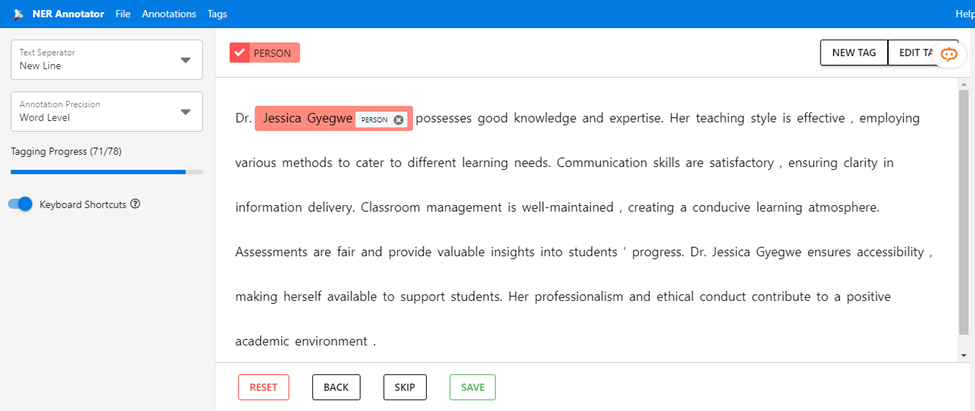

In [14]:
#load annotations
train_data = load_data("/kaggle/input/annotations-for-spacy-ner/Annotation/annotations.json")

## Pre-process annotation data

In [15]:
# Remove None  values
train_data = [item for item in train_data if item is not None]

In [16]:
# Set entity
entity_name = "PERSON"
# Convert to turple
train_data = [tuple(i) for i in train_data]

In [17]:
# format into data usable for training Spacy NER model
for i in train_data:
    if not i[1]['entities']:
        i[1]['entities'] = [(0, 0, entity_name)]
    else:
        i[1]['entities'] = [tuple(entity) for entity in i[1]['entities']]

In [18]:
# Display train_data
train_data

[('Dr. Helen is an interesting lecturer whoŸ??s knowledgeable and has a solid expertise on her field of study. Her teaching style is also interactive, which gives room for students to ask questions and understand more in the classroom. Her communication skills are also remarkable as she explains her teachings in a detailed and simple manner. Classroom management is average because some students take advantage of the fact that sheŸ??s welcoming sometimes. Unfortunately, the accessments are also demanding because she suspects she has given given us all the information we need during teacg sessions. Dr. Helen is accessible to students and always ready to answer questions in areas which they find difficult. She has a strong sense of professionalism and ethics which makes her treat students with respect and fairness as long as they respect themselves too.',
  {'entities': [(4, 9, 'PERSON')]}),
 ('Dr. Helen Edogbanya demonstrates good knowledge and expertise in the subject matter. Her teachi

## Training Model

In [19]:
nlp = spacy.load("en_core_web_sm") # load spacy model

db = DocBin() # create a DocBin object

for text, annot in tqdm(train_data): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)

100%|██████████| 78/78 [00:00<00:00, 765.10it/s]

Skipping entity


In [20]:
# train.spacy will contain spaCy's JSON format 
train_data_path = "train.spacy"
db.to_disk(train_data_path)

In [21]:
# set the path to config.cfg and base_config.cfg
config_path = '/kaggle/input/config-for-spacy-ner/config/config.cfg'
base_config_path = '/kaggle/input/config-for-spacy-ner/config/base_config.cfg'

# command to fill in the remaining defaults
command = "python -m spacy init fill-config {} {}"
formatted_command = command.format(base_config_path, config_path)

!{formatted_command}

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [22]:
# Set folder to save the models
output_path = "model"

# train model and save
command = "python -m spacy train {} --output {} --paths.train {} --paths.dev {}"
formatted_command = command.format(config_path, output_path, train_data_path, train_data_path)

!{formatted_command}

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## TEST Model

### Install and Import necessary libraries

In [23]:
!pip install chardet

In [24]:
import pandas as pd
import csv
import chardet

In [25]:
# Load best model
nlp1 = spacy.load(r"model/model-best")

In [26]:
test_path = '/kaggle/input/lecturer-review-testset/Test.csv'  # path to test data

# load test data
def read_csv_file(file_path):
    rows = []

    # Detect the encoding of the CSV file
    with open(file_path, 'rb') as raw_file:
        result = chardet.detect(raw_file.read())
        csv_encoding = result['encoding']

    # Read the CSV file with the detected encoding
    with open(file_path, 'r', encoding=csv_encoding) as csv_file:
        csv_reader = csv.reader(csv_file)
        rows = list(csv_reader)
    
    return rows

# Assuming 'file_path' is the path to the CSV file
tests = read_csv_file(test_path)

print(tests)


[['REVIEW'], ["Mr. Sebastine Emmanuel possesses good knowledge and expertise in the subject matter. His teaching style is effective, employing various strategies to engage students and cater to different learning preferences. However, there is room for improvement in communication skills to enhance clarity and foster deeper understanding. Classroom management is well-maintained, creating an atmosphere conducive to learning. Students appreciate Mr. Sebastine Emmanuel's fair and comprehensive assessments, which allow them to demonstrate their knowledge and skills. However, accessibility remains a challenge and should be addressed to ensure inclusivity for all students. It is important to emphasize professionalism and ethics in all aspects of teaching, which Mr. Sebastine Emmanuel should strive to uphold."], ["Mr. Umaru Sani is a knowledgeable and experienced educator who demonstrates a strong command of the subject matter. His teaching style is effective, utilizing a combination of tradi

### Extranct Entities

In [27]:

def process_ner(reviews):
    docs = []
    # Skip the first row (reviews[0] is the header)
    for review in reviews[1:]:
        text = review[0]
        doc = nlp1(text) 
        docs.append(doc)
    return docs

docs = process_ner(tests)

In [28]:
# display in Jupyter
spacy.displacy.render(docs, style="ent", jupyter=True)

### Entities and Their Frequency
Entities and Their Frequency of the test data which is 30% of the entire review

In [29]:
# 
def extract_and_count_person_entities(documents):
    
    entities = []

    # Iterate over the entities in the documents
    for doc in documents:
        for entity in doc.ents:
            # Check if the entity label is 'PERSON'
            if entity.label_ == "PERSON":
                entities.append(entity.text.title())  # Convert to title case and append to entities
    return entities

entities = extract_and_count_person_entities(docs)  

In [30]:
# Create a DataFrame from the entities list
df = pd.DataFrame(entities, columns=["Entities"])

# Count the occurrences of each entity
entity_counts = df["Entities"].value_counts().reset_index()

# Rename the columns
entity_counts.columns = ["Entities", "Count"]

In [31]:
entity_counts

Entities  Count
0         David Lanleige      5
1        Helen Edogbanya      5
2     Sebastine Emmanuel      3
3           Wakili Adamu      3
4              Ibe Ibenu      3
5             Umaru Sani      2
6   Veronica Cyril-Okeme      2
7         Jessica Gyegwe      2
8      Emmanuel Akaligwo      2
9     Luke Arinze Ozioko      2
10          Kefas Bitrus      2
11     Chinenye Ezewweke      1
12    Sabestine Emmanuel      1
13                   Ibe      1

# Aspect-Triplet Extraction
Next i perform **Aspect-Triplet Extraction** using the ***pyABSA** library* in other to extract Aspect, Opinion and Sentiment from each review

## intallation and Importing of libraries

In [32]:
# install the library if not already insatlled
!pip install pyabsa

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
#!pip install transformers==4.29.0

In [34]:
# import available checkpoints
from pyabsa import (
    TaskCodeOption,
    available_checkpoints,
)

No CUDA GPU found in your device


/bin/sh: 1: nvidia-smi: not found
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


[2023-08-12 14:16:05] (2.3.3) PyABSA(2.3.3): If your code crashes on Colab, please use the GPU runtime. Then run "pip install pyabsa[dev] -U" and restart the kernel.
Or if it does not work, you can use v1.16.27




Try to downgrade transformers<=4.29.0.






In [35]:
# choose task
task = TaskCodeOption.Aspect_Sentiment_Triplet_Extraction

/opt/conda/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=1>
  _warn(f"unclosed running multiprocessing pool {self!r}",


In [36]:
# select the check point and model
from pyabsa import AspectSentimentTripletExtraction as ASTE
triplet_extractor = ASTE.AspectSentimentTripletExtractor(checkpoint="multilingual")

[2023-08-12 14:16:17] (2.3.3) Downloading checkpoint:multilingual 
[2023-08-12 14:16:17] (2.3.3) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets


Find zipped checkpoint: ./checkpoints/ASTE_MULTILINGUAL_CHECKPOINT/EMCGCN-Multilingual-f1_51.95.zip, unzipping


Done.
[2023-08-12 14:16:31] (2.3.3) If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA/resolve/main/checkpoints/Multilingual/ASTE/EMCGCN-Multilingual-f1_51.95.zip 
[2023-08-12 14:16:31] (2.3.3) Load sentiment classifier from checkpoints/ASTE_MULTILINGUAL_CHECKPOINT/emcgcn_custom_dataset_f1_51.95
[2023-08-12 14:16:31] (2.3.3) config: checkpoints/ASTE_MULTILINGUAL_CHECKPOINT/emcgcn_custom_dataset_f1_51.95/emcgcn.config
[2023-08-12 14:16:31] (2.3.3) state_dict: checkpoints/ASTE_MULTILINGUAL_CHECKPOINT/emcgcn_custom_dataset_f1_51.95/emcgcn.state_dict
[2023-08-12 14:16:31] (2.3.3) model: None
[2023-08-12 14:16:31] (2.3.3) tokenizer: checkpoints/ASTE_MULTILINGUAL_CHECKPOINT/emcgcn_custom_dataset_f1_51.95/emcgcn.tokenizer
[2023-08-12 14:16:32] (2.3.3) Set Model Device: cpu
[2023-08-12 14:16:32] (2.3.3) Device Name: Unknown


/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


Some weights of the model checkpoint at microsoft/mdeberta-v3-base were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.bias', 'deberta.embeddings.word_embeddings._weight', 'lm_predictions.lm_head.bias', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.classifier.weight', 'mask_predictions.dense.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSeque

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [39]:
# Load dataset
review_path = "/kaggle/input/lecturer-reviewful/reviews.csv"

review_corpus = read_csv_file(review_path)

In [40]:
review_corpus

[['REVIEW'],
 ['Dr. Helen is an interesting lecturer whoü??s knowledgeable and has a solid expertise on her field of study. Her teaching style is also interactive, which gives room for students to ask questions and understand more in the classroom. Her communication skills are also remarkable as she explains her teachings in a detailed and simple manner. Classroom management is average because some students take advantage of the fact that sheü??s welcoming sometimes. Unfortunately, the accessments are also demanding because she suspects she has given given us all the information we need during teacg sessions. Dr. Helen is accessible to students and always ready to answer questions in areas which they find difficult. She has a strong sense of professionalism and ethics which makes her treat students with respect and fairness as long as they respect themselves too.'],
 ['Dr. Helen Edogbanya demonstrates good knowledge and expertise in the subject matter. Her teaching style is excellent, 

## Entity extraction on the entire dataset

In [41]:
review_docs = process_ner(review_corpus)

In [42]:
review_entities = extract_and_count_person_entities(review_docs) 

In [43]:
review_entities

['Helen',
 'Helen Edogbanya',
 'Kefas Bitrus',
 'Sebastine Emmanuel',
 'Umaru Sani',
 'David Lanleige',
 'Wakili Adamu',
 'Veronica Cyril-Okeme',
 'David Lanleige',
 'Kehinde',
 'Jessica Gyegwe',
 'Ibe Ibenu',
 'Helen',
 'Kefas',
 'Ibe',
 'Umaru Sani',
 'Helen Edogbanya',
 'Helen Edogbanya',
 'Helen Edogbanya',
 'Kefas Bitrus',
 'Sebastine Emmanuel',
 'Umaru Sani',
 'Wakili Adamu',
 'David Lanleige',
 'Veronica Cyril-Okeme',
 'Jessica Gyegwe',
 'Ibe Ibenu',
 'Helen Edogbanya',
 'Helen Edogbanya',
 'David Lanleige',
 'Helen Edogbanya',
 'Ibe Ibenu',
 'Helen Edogbanya',
 'Ibe Ibenu',
 'Kefas Bitrus',
 'David Lanleige',
 'Kefas',
 'Jessica Gyegwe',
 'Umaru Sani',
 'Sebastine Emmanuel',
 'Luke Arinze Ozioko',
 'Chinenye Ezewweke',
 'Kehinde',
 'Helen Edogbanya',
 'Kefas Bitrus',
 'Sebastine Emmanuel',
 'David Lanleige',
 'Wakili Adamu',
 'Veronica Cyril-Okeme',
 'Jessica Gyegwe',
 'Ibe Ibenu',
 'Helen Edogbanya',
 'Kefas Bitrus',
 'Sebastine Emmanuel',
 'Umaru Sani',
 'David Lanleige',
 'W

## Entities and Their Frequency
Entities and Their Frequency of the entire dataset

In [44]:
# Create a DataFrame from the entities list
df1 = pd.DataFrame(review_entities, columns=["Entities"])

# Count the occurrences of each entity
review_entity_counts = df1["Entities"].value_counts().reset_index()

# Rename the columns
review_entity_counts.columns = ["Entities", "Count"]

In [45]:
review_entity_counts

Entities  Count
0        Helen Edogbanya     18
1         David Lanleige     13
2              Ibe Ibenu     10
3     Sebastine Emmanuel      9
4           Kefas Bitrus      8
5             Umaru Sani      8
6           Wakili Adamu      8
7         Jessica Gyegwe      8
8   Veronica Cyril-Okeme      7
9     Luke Arinze Ozioko      5
10     Emmanuel Akaligwo      4
11     Chinenye Ezewweke      4
12                 Helen      2
13               Kehinde      2
14                   Ibe      2
15                 Kefas      2
16    Sabestine Emmanuel      1

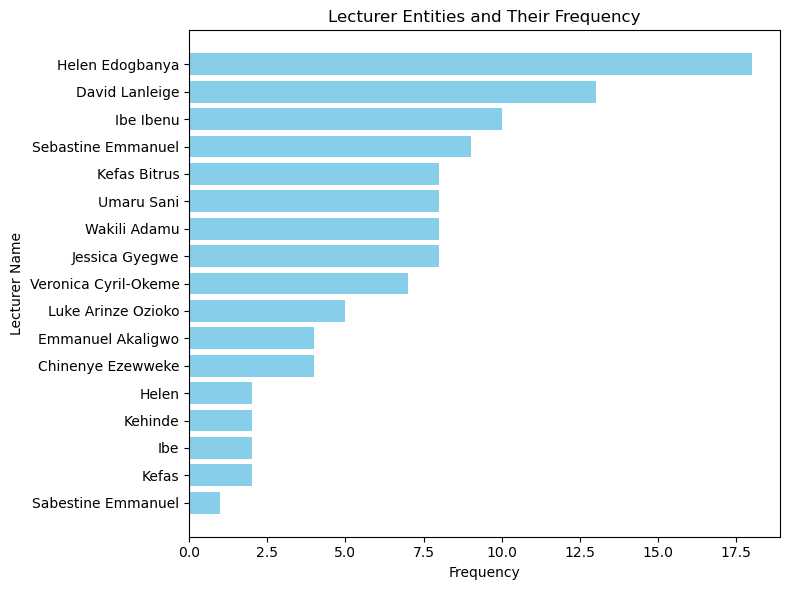

In [18]:
# 
lecturer_names = review_entity_counts['Entities']
frequency = review_entity_counts['Count']

plt.figure(figsize=(8, 6))
plt.barh(lecturer_names, frequency, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Lecturer Name')
plt.title('Lecturer Entities and Their Frequency')
plt.gca().invert_yaxis()  # Invert y-axis to display names from top to bottom
plt.tight_layout()

plt.savefig('entity_frequency_plot.png')  # Save the plot as an image
plt.show()

## Aspect Triplet Extraction

In [46]:
# Function to split each text(review) into sentences
def split_into_sentences(text):
    sentences = [sentence.strip() for sentence in text.split('.') if sentence.strip()]
    sentences = [sentence for sublist in [sentence.split(',') for sentence in sentences] for sentence in sublist]
    return sentences


In [47]:
# Redefined function to extract entity and aspect triplets
def extract_entity_and_triplets(review_corpus):
    results = [] 
    
    # Iterate over each review text in the corpus
    for review_text in review_corpus:
        sentences = split_into_sentences(review_text[0])
        entity = review_entities[len(results)]  # Get the entity for this review
        review_results = []
        # Predict triplets for each sentence and append the non-empty results
        for sentence in sentences:
            result = triplet_extractor.predict(sentence)
            if result['Triplets']:
                review_results.append(result)
        if review_results:
            results.append((entity, review_results))
    return results


In [ ]:
# 
result = extract_entity_and_triplets(review_corpus)


[2023-08-12 14:16:57] (2.3.3) Batch: 0 {'sentence_id': 0, 'sentence': 'REVIEW', 'Triplets': [], 'True Triplets': []}
[2023-08-12 14:16:57] (2.3.3) Batch: 0 {'sentence_id': 0, 'sentence': 'REVIEW', 'Triplets': [], 'True Triplets': []}
[2023-08-12 14:16:57] (2.3.3) Batch: 0 {'sentence_id': 0, 'sentence': 'Dr', 'Triplets': [], 'True Triplets': []}
[2023-08-12 14:16:57] (2.3.3) Batch: 0 {'sentence_id': 0, 'sentence': 'Dr', 'Triplets': [], 'True Triplets': []}
[2023-08-12 14:16:57] (2.3.3) Batch: 0 {'sentence_id': 0, 'sentence': 'Helen is an interesting lecturer whoü??s knowledgeable and has a solid expertise on her field of study', 'Triplets': [{'Aspect': 'lecturer', 'Opinion': 'interesting', 'Polarity': 'Positive'}], 'True Triplets': []}
[2023-08-12 14:16:57] (2.3.3) Batch: 0 {'sentence_id': 0, 'sentence': 'Helen is an interesting lecturer whoü??s knowledgeable and has a solid expertise on her field of study', 'Triplets': [{'Aspect': 'lecturer', 'Opinion': 'interesting', 'Polarity': 'Posi

In [53]:
# Create a DataFrame from the results
def create_dataframe_from_results(results):
    entities_list = []
    aspects_list = []
    opinions_list = []
    polarity_list = []
    # Iterate over each result
    for entity, review in results:
        # Iterate over each dictionary in the element
        for sentence in review:
            # Extract the triplet values from the sentence where there is no error
            if not sentence.get('error'):
                aspect = sentence['Triplets'][0]['Aspect']
                opinion = sentence['Triplets'][0]['Opinion']
                polarity = sentence['Triplets'][0]['Polarity']
                # Append the values to the corresponding lists
                entities_list.append(entity)
                aspects_list.append(aspect)
                opinions_list.append(opinion)
                polarity_list.append(polarity)
    # Create a DataFrame from the extracted triplet values
    df = pd.DataFrame({
        'Entity': entities_list,
        'Aspect': aspects_list,
        'Opinion': opinions_list,
        'Polarity': polarity_list
    })
    return df
df_result = create_dataframe_from_results(result)


In [54]:
df_result

Entity                Aspect             Opinion  Polarity
0           Helen              lecturer         interesting  Positive
1           Helen        teaching style         interactive   Neutral
2           Helen  communication skills          remarkable  Positive
3           Helen  Classroom management             average   Neutral
4           Helen           accessments           demanding  Negative
..            ...                   ...                 ...       ...
923  Wakili Adamu  Classroom management                poor  Negative
924  Wakili Adamu  learning environment        disorganized  Negative
925  Wakili Adamu           Assessments         challenging  Negative
926  Wakili Adamu              students  causing difficulty  Negative
927  Wakili Adamu          Wakili Adamu          accessible  Positive

[928 rows x 4 columns]

In [56]:
# Save as csv
df_result.to_csv("entity aspect opinion sentiment.csv", index=False)

### Explore aspects
Explore Aspect and pre-process

In [2]:
# Read the CSV file
df = pd.read_csv('/kaggle/input/entity-aspect-opinion-sentiment/entity aspect opinion sentiment.csv')

In [3]:
# Convert the 'Aspects' column to lowercase
df['Aspect'] = df['Aspect'].str.lower()


In [4]:
# Define the mapping for renaming the aspects
aspect_mapping = {
    'teaching style': ['teaching style', 'teaching approach', 'teaching'],
    'communication skill': ['communication skill', 'communication'],
    'classroom management': ['classroom management', 'manages'],
    'accessments': ['accessment'],
    'learning experience': ['learning experience'],
    'accessibility': ['accessibility', 'access'],
    'approach to students': ['approach to student'],
    'ethics': ['ethics','ethical'],
    'knowledge': ['knowledge'],
    'Professionalism': ['Professional'],
    'understanding of concepts': ['understanding of concept','understanding'],
    'interaction with students': ['interaction with student','interaction'],
    'learning objectives': ['learning objective'],
    'expertise': ['expertise'],
    'engage students': ['engage student','engagement'],
    'organization': ['organization'],
    'learning experience': ['learning experience'],
    'explanations': ['explanation'],
    'student treatment': ['treating student'],
    'standard': ['standard'],
    'convey information': ['convey information','information'],
    'support student': ['support student','support'],
    'subject area': ['subject area'],
    'convey information': ['convey information','information'],
    'evaluating students perfomance' : ['evaluating students perfomance']
}

In [5]:
# Define the specific aspects to filter for
aspects_to_filter = [
    'teaching style',
    'communication skill',
    'classroom management',
    'accessments',
    'learning experience',
    'accessibility',
    'approach to students',
    'ethics',
    'knowledge',
    'Professionalism',
    'understanding of concepts',
    'interaction with students',
    'learning objectives',
    'expertise',
    'engage students',
    'organization',
    'learning experience',
    'explanations',
    'student treatment',
    'standard',
    'convey information',
    'support student',
    'subject area',
    'convey information',
    'evaluating students perfomance',
    'creativity',
    'proficiency',
    'evaluating students perfomance'
    ]

In [6]:
# Filter and rename the aspects
filtered_df = df.copy()
for aspect, replacements in aspect_mapping.items():
    aspect_matches = filtered_df['Aspect'].str.contains('|'.join(replacements))
    filtered_df.loc[aspect_matches, 'Aspect'] = aspect

In [7]:
# Filter the dataframe to include only the aspects that contain any value from aspects_to_filter
filtered_df = filtered_df[filtered_df['Aspect'].str.contains('|'.join(aspects_to_filter))]

In [8]:
filtered_df

Entity                     Aspect        Opinion  Polarity
1              Helen             teaching style    interactive   Neutral
2              Helen        communication skill     remarkable  Positive
3              Helen       classroom management        average   Neutral
4              Helen              accessibility      demanding  Negative
7    Helen Edogbanya             teaching style      excellent  Positive
..               ...                        ...            ...       ...
916              Ibe             teaching style  knowledgeable  Positive
919     Wakili Adamu             teaching style           good  Positive
921     Wakili Adamu        communication skill           poor  Negative
922     Wakili Adamu  understanding of concepts         hinder  Negative
923     Wakili Adamu       classroom management           poor  Negative

[449 rows x 4 columns]

## Aspect Triplets and Sentiment Distribution

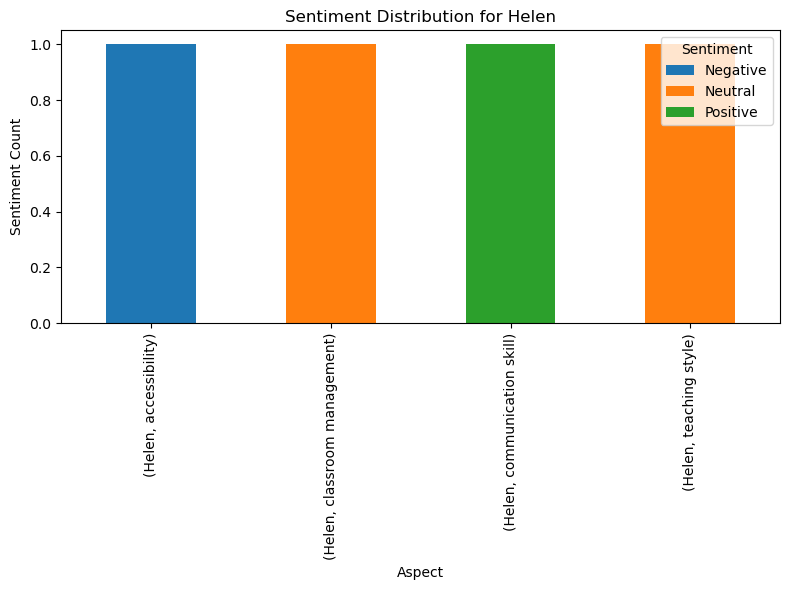

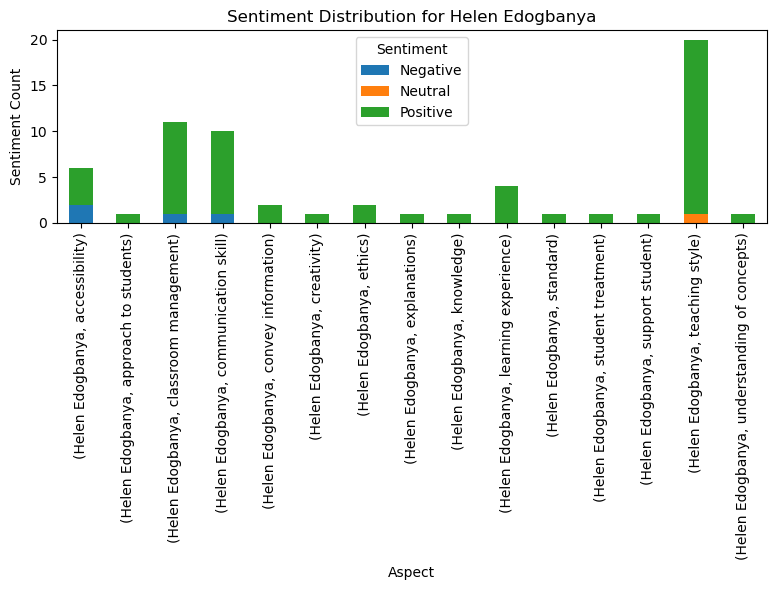

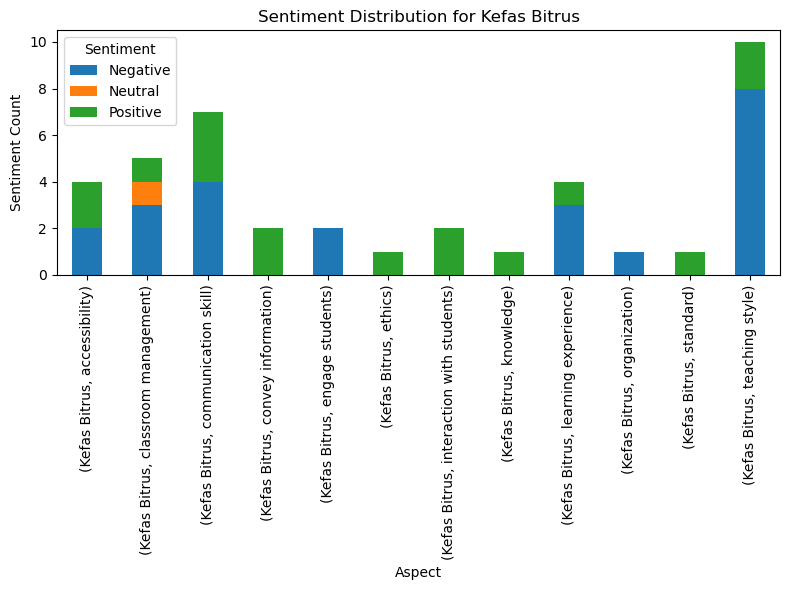

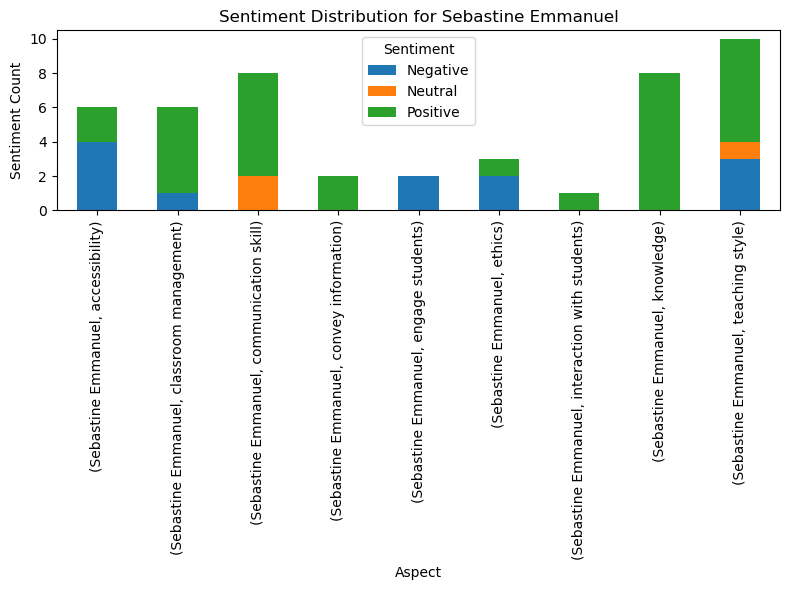

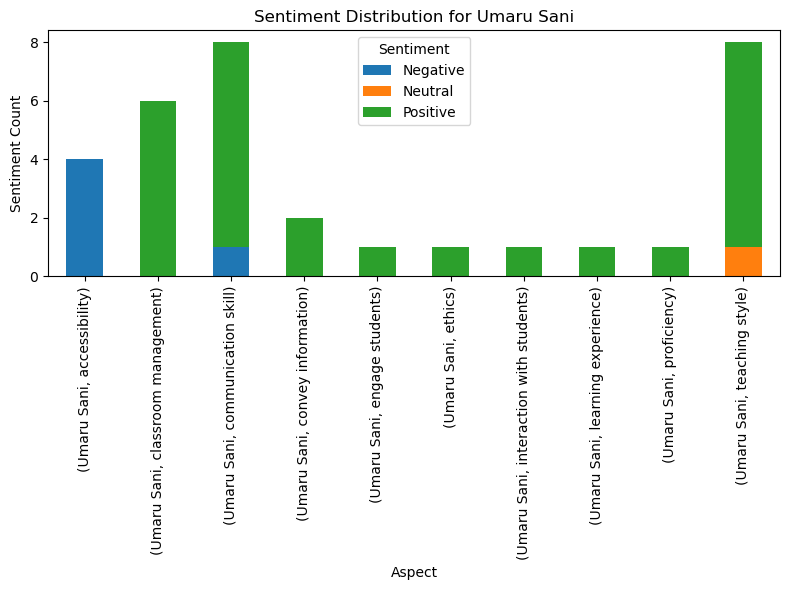

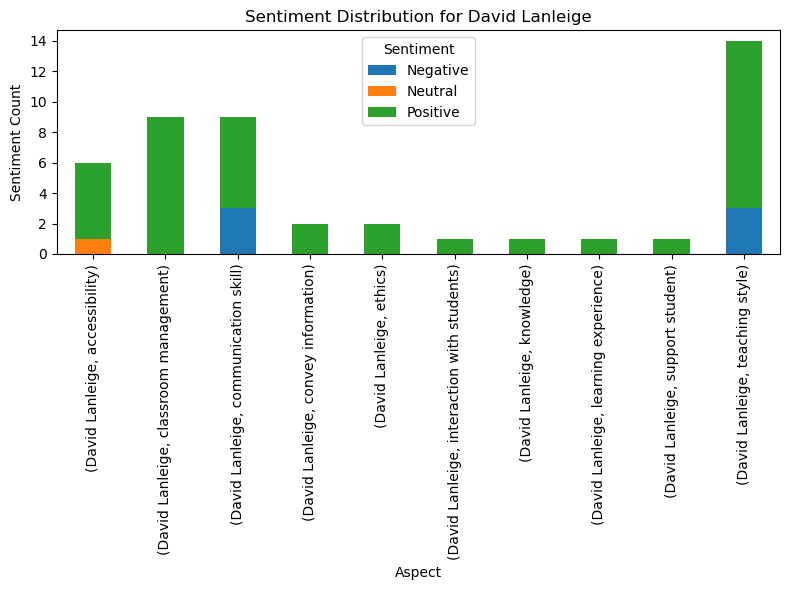

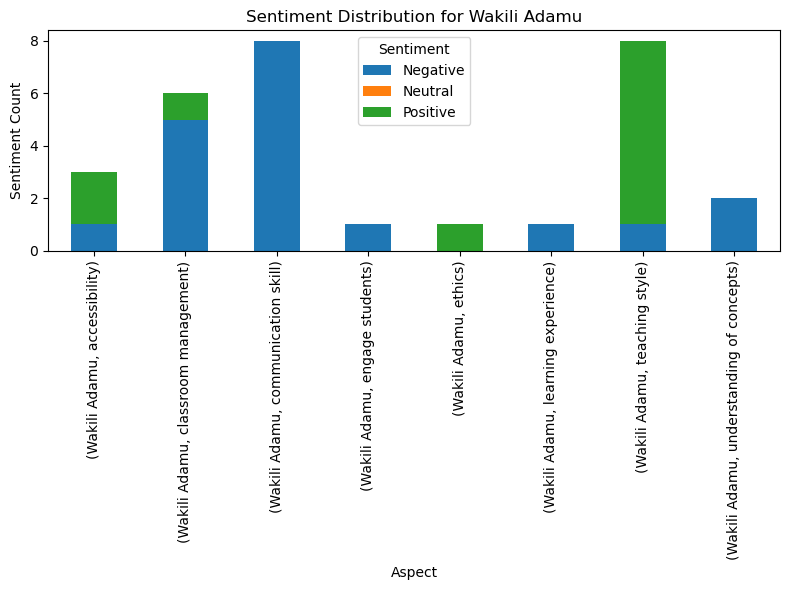

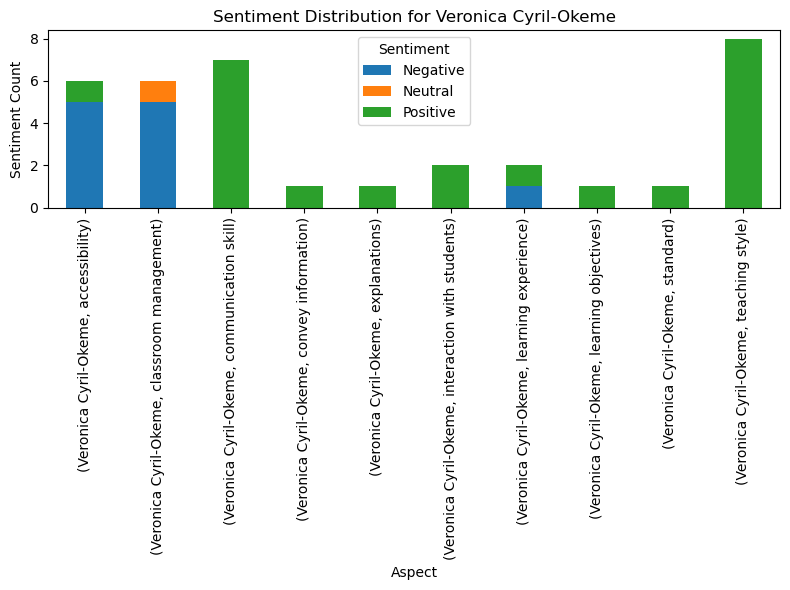

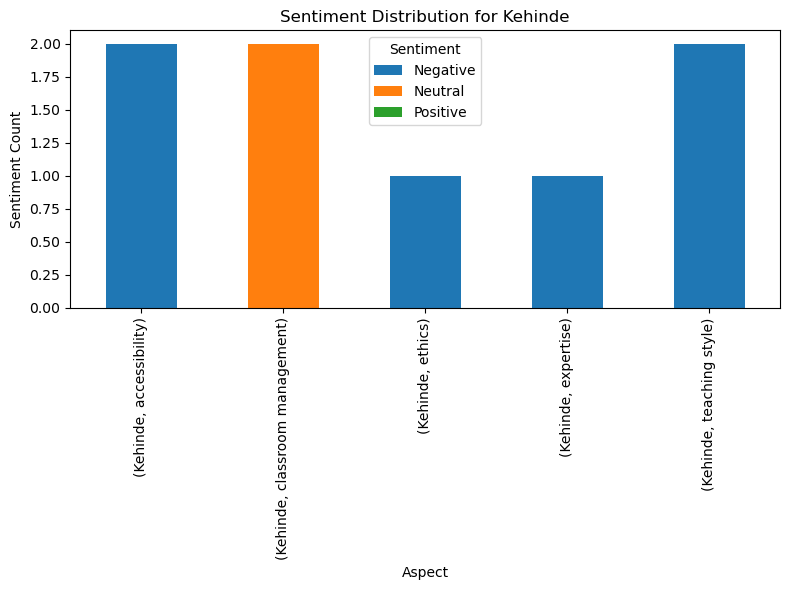

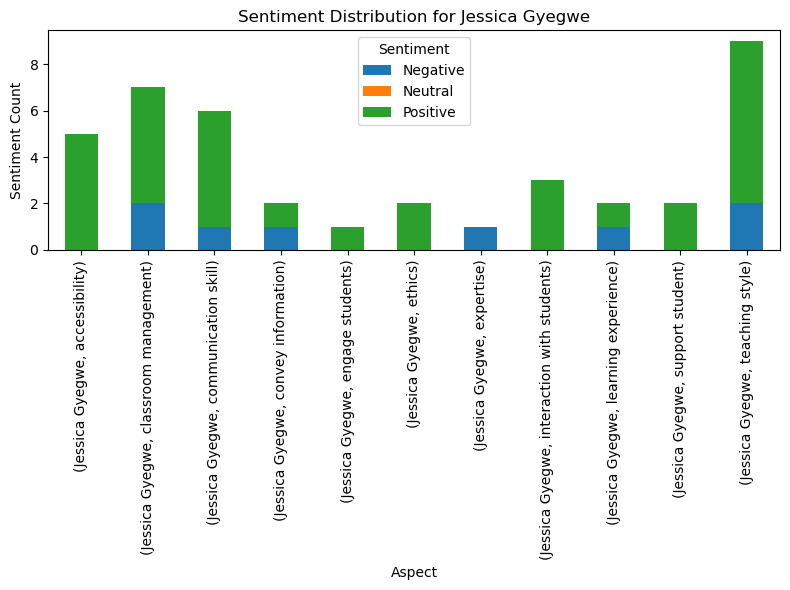

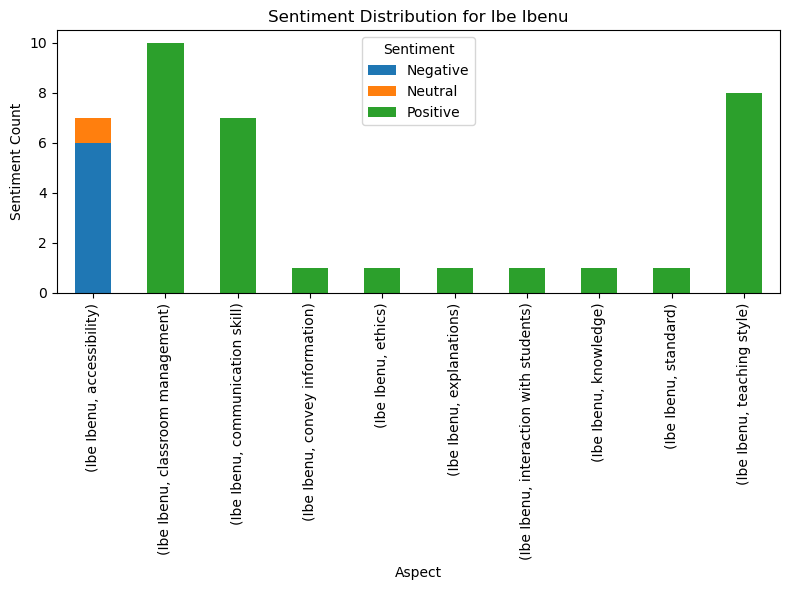

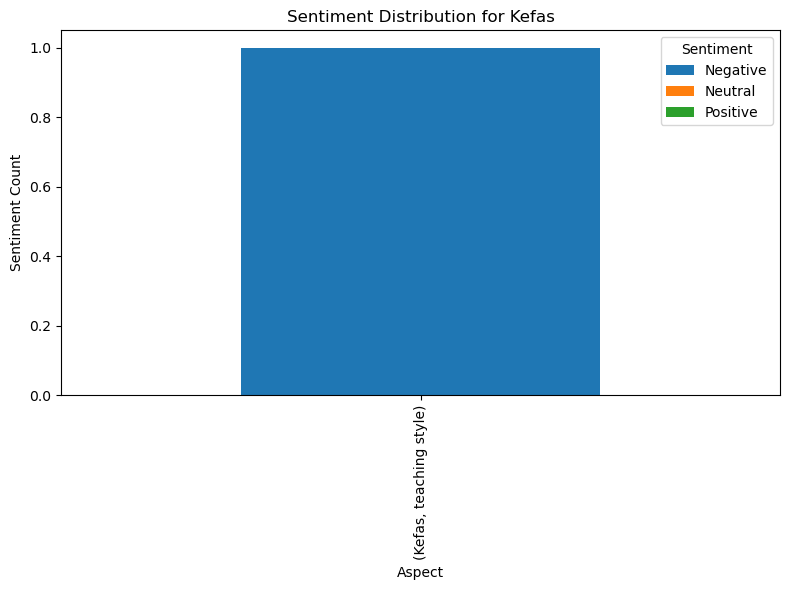

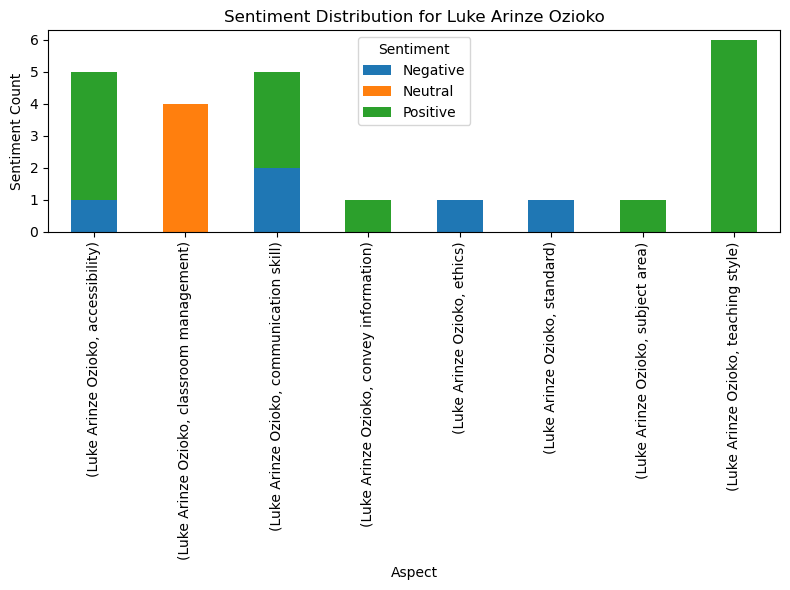

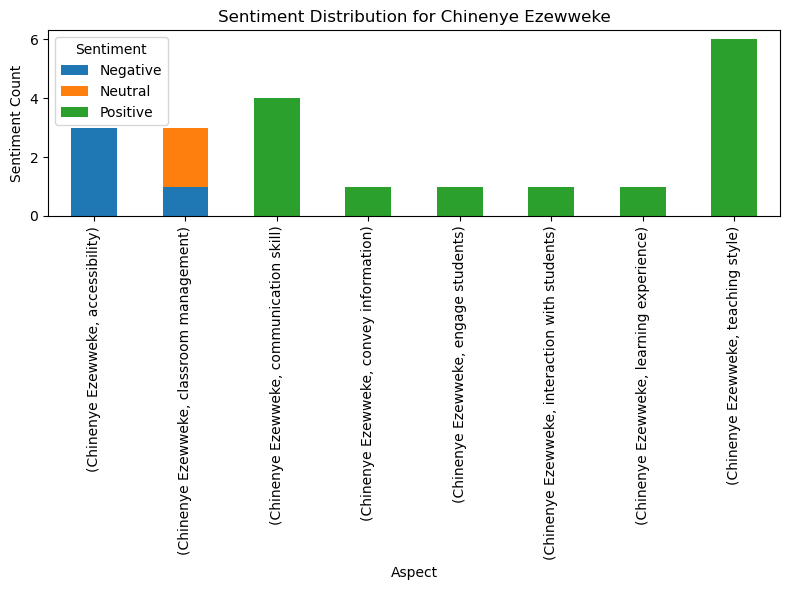

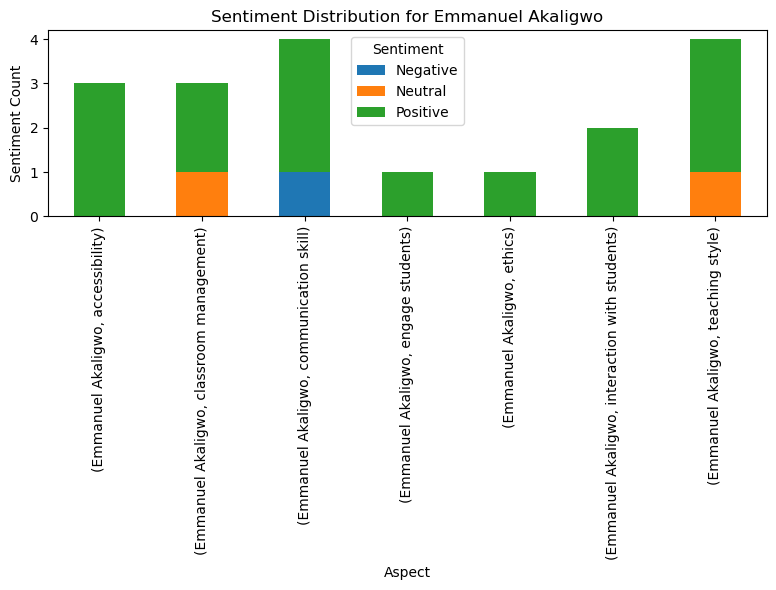

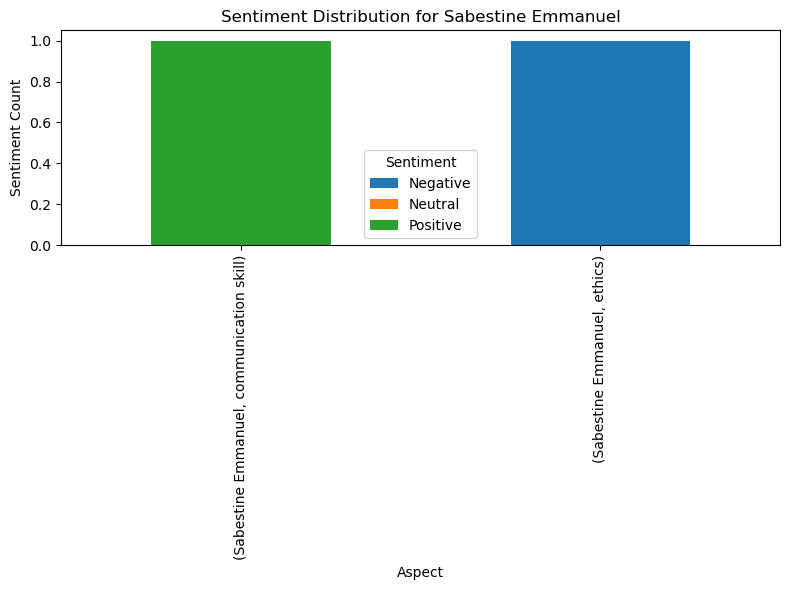

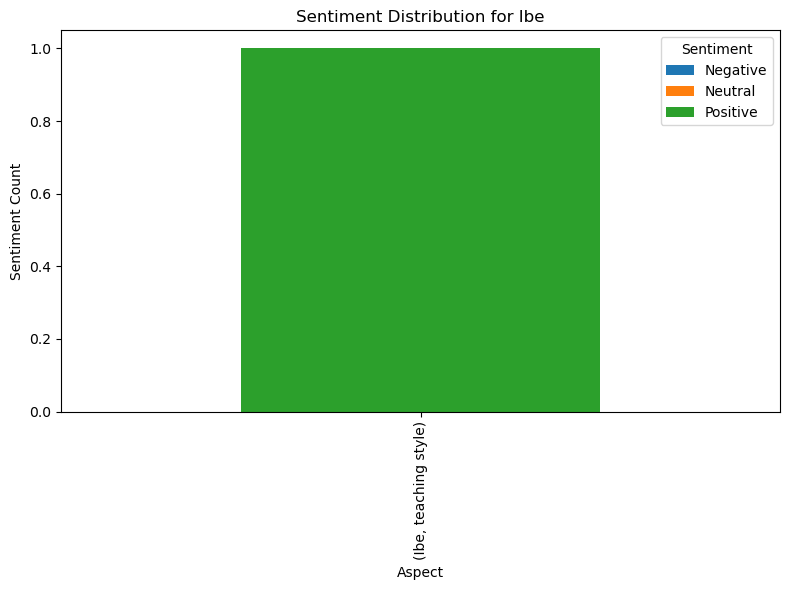

In [69]:
# Group data by Entity and Aspect, and count the sentiment distribution
grouped_df1 = filtered_df.groupby(['Entity', 'Aspect', 'Polarity'])['Polarity'].count().unstack(fill_value=0)

# Calculate the total sentiment counts for each entity-aspect pair
grouped_df1['Total'] = grouped_df1.sum(axis=1)

# Get unique entities
unique_entities = filtered_df['Entity'].unique()

# Create a separate plot for each unique entity
for entity in unique_entities:
    entity_df = grouped_df1[grouped_df1.index.get_level_values('Entity') == entity]
    entity_df[['Negative', 'Neutral', 'Positive']].plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(f'Sentiment Distribution for {entity}')
    plt.xlabel('Aspect')
    plt.ylabel('Sentiment Count')
    plt.xticks(rotation=90)
    plt.legend(title='Sentiment')
    plt.tight_layout()
    
    plt.savefig(f'Sentiment Distribution plot for {entity}.png')  # Save the plot as an image
    plt.show()

In [9]:
# Group the data by 'Entities' and 'Aspect' and count the occurrences of each sentiment
grouped_df = filtered_df.groupby(['Entity', 'Aspect', 'Polarity']).size().unstack(fill_value=0).reset_index()
grouped_df['Aspect Count'] = grouped_df[['Negative', 'Neutral', 'Positive']].sum(axis=1)

In [10]:
grouped_df

Polarity             Entity                     Aspect  Negative  Neutral  \
0         Chinenye Ezewweke              accessibility         3        0   
1         Chinenye Ezewweke       classroom management         1        2   
2         Chinenye Ezewweke        communication skill         0        0   
3         Chinenye Ezewweke         convey information         0        0   
4         Chinenye Ezewweke            engage students         0        0   
..                      ...                        ...       ...      ...   
126            Wakili Adamu            engage students         1        0   
127            Wakili Adamu                     ethics         0        0   
128            Wakili Adamu        learning experience         1        0   
129            Wakili Adamu             teaching style         1        0   
130            Wakili Adamu  understanding of concepts         2        0   

Polarity  Positive  Aspect Count  
0                0             3  
1                0             3  
2                4             4  
3                1             1  
4                1             1  
..             ...           ...  
126              0             1  
127              1             1  
128              0             1  
129              7             8  
130              0             2  

[131 rows x 6 columns]

## Aggregate Sentiment Analysis

In [11]:
# Find the maximum polarity for each combination of entity and aspect
grouped_df['Max_Polarity'] = grouped_df[['Negative', 'Neutral', 'Positive']].idxmax(axis=1)

# Map the maximum polarity to corresponding sentiment values
sentiment_mapping = {
    'Negative': 'Negative',
    'Neutral': 'Neutral',
    'Positive': 'Positive'
}
grouped_df['Max_Sentiment'] = grouped_df['Max_Polarity'].map(sentiment_mapping)


In [12]:
# Drop unnecessary columns
summary_df = grouped_df[['Entity', 'Aspect', 'Max_Sentiment']]

# Rename columns
summary_df.columns = ['Entity', 'Aspect', 'Final Sentiment']

In [13]:
summary_df

Entity                     Aspect Final Sentiment
0    Chinenye Ezewweke              accessibility        Negative
1    Chinenye Ezewweke       classroom management         Neutral
2    Chinenye Ezewweke        communication skill        Positive
3    Chinenye Ezewweke         convey information        Positive
4    Chinenye Ezewweke            engage students        Positive
..                 ...                        ...             ...
126       Wakili Adamu            engage students        Negative
127       Wakili Adamu                     ethics        Positive
128       Wakili Adamu        learning experience        Negative
129       Wakili Adamu             teaching style        Positive
130       Wakili Adamu  understanding of concepts        Negative

[131 rows x 3 columns]